In [1]:
import os
import re
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# collect data
# ../Data/DataForClassification/p2v/
fileDir = "../Data/DataForClassification/d2v/"
fileList = os.listdir(fileDir)
print(fileList)

# loop through files in directory 
# add name to name list
name_list = []
for file in fileList:
    if not file.startswith('.'):
        if not re.match(r'\D*\d+.txt$', file):
            name_list.append(file)
print(name_list)

# for name in namelist:
#     int counter = 0;
#     for file in fileList:
#         if not file.startswith('.'):
            
# hard code to read the file one by one
# author as positive sample, other as all samples
author_features = []
other_features = []
with open(fileDir+"michael wagner0.txt", 'r', encoding = 'utf8') as f:
    for line in f:
        author_features.append(line.strip().split(" "))

with open(fileDir+"michael wagner.txt", 'r', encoding = 'utf8') as f:
    for line in f:
        other_features.append(line.strip().split(" "))
        
print(author_features[0])
print(other_features[0])

['vivek gupta0.txt', 'ana castro1.txt', 'amit patel.txt', 'jun chen2.txt', 'carmen torres0.txt', 'robert j young.txt', 'mikael svensson0.txt', 'marco ferrari1.txt', 'wei wang1.txt', 'peng zhang0.txt', 'martin wagner.txt', 'lei wang3.txt', 'michael wagner.txt', 'david g lloyd.txt', 'marco ferrari0.txt', 'carmen moreno.txt', 'jong hee chang.txt', 'chung-may yang1.txt', 'jacob john0.txt', 'jong hee chang0.txt', 'hao song.txt', 'wei lu0.txt', 'qin li0.txt', 'yongsheng liu.txt', 'kevin m. ryan.txt', 'jeremy m brown1.txt', 'alfredo martinez1.txt', 'yu-jun zhao.txt', 'yongsheng liu1.txt', 'jin young kim1.txt', 'yong wang1.txt', 'david g lloyd0.txt', 'jeremy m brown0.txt', 'vineet gupta1.txt', 'xin li.txt', 'vivek kumar1.txt', 'alfredo martinez.txt', 'wei lu.txt', 'yong liu0.txt', 'anna ferrari.txt', 'wei lu1.txt', 'feng liu1.txt', 'wei wang.txt', 'yu zhang1.txt', 'jeong hwan kim.txt', 'hong yang0.txt', 'david g lloyd1.txt', 'kyung su kim0.txt', 'jacob john.txt', 'fang liu.txt', 'jie zhang0.tx

In [2]:
# size of each class
print(len(author_features))
print(len(other_features))

16
255


In [3]:
# dimension of each class
print(len(author_features[0]))
print(len(other_features[0]))

101
101


In [4]:
import pandas as pd
import random

# remove author(positive sample) from other(negative sample)
allPaperVectors = [x for x in other_features if x not in author_features]
print("Negative sample size:", len(allPaperVectors))

# random take sample from all the papers and treat it as class 2
# random sample will have same size with author's size
if len(author_features)>len(allPaperVectors):
    randomSample = allPaperVectors
else:
    randomSample = random.sample(allPaperVectors, len(author_features))

classOne = pd.DataFrame(author_features)
classOne["label"] = 0
#print(classOne[:2:])

classTwo = pd.DataFrame(randomSample)
classTwo["label"] = 1
#print(classTwo[:2:])

# combine data from different class get all data
combinedData = pd.concat([classOne, classTwo])
print(combinedData[:5])
combinedData = combinedData.sample(frac=1).reset_index(drop=True)
print(combinedData[:5])
# take the paper id out
paperID = combinedData[0]
# split data and label
data = combinedData.drop([0,'label'], axis=1)
label = combinedData['label']
print("Total sample size and shape: ",data.shape)


Negative sample size: 239
          0            1            2            3            4           5  \
0  11913376   0.08125255  -0.26923013   0.12350058   0.21943399  0.59610617   
1  12973727  -0.12425368  -0.61719823  -0.14773583   0.29436713  0.85312623   
2  15857247   0.39831164  -0.19049157   0.66954857   1.00282347  1.09913301   
3  17081057  -0.65990341  -0.43371347  -0.04118128  -0.02935118  0.15726706   
4  18333798  -0.07879562  -0.08480105   0.02117494   0.10787108  0.07532892   

             6            7            8           9  ...            92  \
0   0.51254380   0.22898267  -0.10301466  0.30326331  ...    0.71827167   
1  -0.61940527   0.45467871   0.21129733  0.66855842  ...    0.79690182   
2  -0.13993333  -0.47397777   0.27701509  0.53899837  ...   -0.08898772   
3  -0.41299382   0.11691877  -0.04782787  0.46951130  ...    0.32706594   
4  -0.08695129   0.08676738  -0.04744303  0.11769948  ...    0.07910561   

            93          94          95          

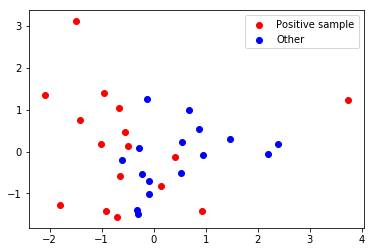

In [5]:
# Principal Component Analysis (PCA) applied to this data identifies the combination of attributes
# (principal components, or directions in the feature space) that account for the most variance in the data.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_transformed = pd.DataFrame(pca.fit_transform(X=data, y=label))
pca_transformed["label"] = label
#print(pca_transformed)
plt.scatter(pca_transformed[label==0][0], pca_transformed[label==0][1], label='Positive sample', c='red')
plt.scatter(pca_transformed[label==1][0], pca_transformed[label==1][1], label='Other', c='blue')
plt.legend()
plt.show()

In [6]:
# Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes.
# In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit(data, label).transform(data))
#print(lda_transformed)
# plt.scatter(lda_transformed[label==0][0], lda_transformed[label==0][1], label='Class 1', c='red')
# plt.scatter(lda_transformed[label==1][0], lda_transformed[label==1][1], label='Class 2', c='blue')
# plt.legend()
# plt.show()

/home/gao137/intel/intelpython3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              0            1  label
0  -1235.446045   361.705780      1
1    597.428589  -466.834808      1
2    948.410889  -788.553894      1
3   2330.454102  2066.631104      0
4    189.577927  -749.159546      1
5    -61.791752   842.576965      0
6  -1092.095337  1037.177979      0
7    275.081360   575.682068      1
8    226.479767  -281.133148      1
9   -123.146088   338.782684      0
10   297.486115   146.487076      0
11  -189.570190  -549.430420      1
12  -912.685547  -138.541443      0
13   691.650208    14.423253      0
14  1040.896362   908.262756      1
15 -1781.895630  -580.532104      0
16 -1108.685913  -698.671326      0
17  -485.050262  1089.960327      0
18  -535.439453   118.137543      1
19    50.849743  1319.978516      1
20  -836.736084   474.986389      0
21 -1381.180420   -97.401192      1
22  -453.278595   625.655762      0
23  -187.959778 -1151.591431      0
24  1170.498413   299.815979      0
25   497.207794  1031.871582      0
26  -534.999939  -337.040924

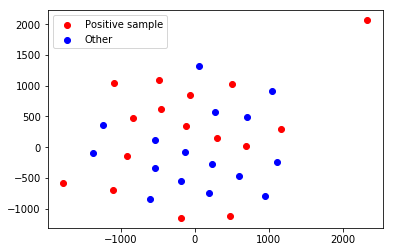

In [13]:
# TSNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
tsne_transformed = TSNE(n_components=2, init = "pca").fit_transform(data)
tsne_transformed_normalized = Normalizer(norm='l2').fit_transform(tsne_transformed)
tsne_transformed_normalized = pd.DataFrame(tsne_transformed)
tsne_transformed_normalized["label"] = label
print(tsne_transformed_normalized)
plt.scatter(tsne_transformed_normalized[label==0][0], tsne_transformed_normalized[label==0][1], label='Positive sample', c='red')
plt.scatter(tsne_transformed_normalized[label==1][0], tsne_transformed_normalized[label==1][1], label='Other', c='blue')
plt.legend()
plt.show()

In [10]:
# cross validation
def k_fold_cv(data, label, classifier, clfname):
    kf = KFold(n_splits=10, shuffle=False)
    roundf1 = []
    for train_index, test_index in kf.split(data):
        # print("TRAIN:", train_index, " \n TEST:", test_index)
        # split train and test
        data_train, data_test = data.iloc[train_index], data.iloc[test_index]
        label_train, test_true_label = label.iloc[train_index], label.iloc[test_index]
        # fit data to svm
        classifier.fit(data_train, label_train)
        # get predicted label
        label_pred = classifier.predict(data_test)
        # find out which sample cause the issue
        print("Pred: ",label_pred)
        print("True: ", test_true_label.values.tolist())
        print("Mislabeled sample: ",end='')
        for i in range(len(test_true_label)):
            if(label_pred[i]!=test_true_label[test_index[i]]):
                print(paperID[test_index[i]]+",",end='')
        print()
        # find round confusion matrix
        metrics.confusion_matrix(test_true_label, label_pred).ravel()
        roundf1.append(f1_score(test_true_label, label_pred,average='micro'))
        # print("True positive: {tp}, False positive: {fp}, False negative: {fn}, True negative: {tn}"
        # .format(tp=round_tp, fp=round_fp, fn=round_fn, tn=round_tn))

    print("Classifier: {name}".format(name=clfname))
    f1 = np.average(roundf1)
    print("F1: ", f1)
    # return ppv, npv, specificity, sensitivity, accuracy, f1

In [11]:

# create linear SVM model
linear_svc = svm.SVC(kernel='linear', class_weight='balanced', probability=True)
print(linear_svc)

# fit model and do 10-fold cv
k_fold_cv(data, label, linear_svc, "SVM linear")


'''
# compute the distance to decision boundry (Not same as confidence measure)
Distance = linear_svc.decision_function(allDatas)

# computer the confidence measure (Platt scaling: transforming the outputs of a 
# classification model into a probability distribution over classes)
# P(class/input) = 1 / (1 + exp(A * f(input) + B))
# P(class/input) is the probability that “input” belongs to “class” 
# and f(input) is the signed distance of the input datapoint from the boundary,
# which is basically the output of “decision_function”. 

proba = linear_svc.predict_proba(allDatas)

'''

# create rbf SVM model with C=10 where (C*Error) is added into minimize function
# C big means error matter more
rbf_svc = svm.SVC(kernel='rbf', C=100)
print(rbf_svc)

# fit model and do 10-fold cv
k_fold_cv(data, label, rbf_svc, "SVM rbf")

# # apply the linear svc for all the data in environment
# label_pred = rbf_svc.predict(allDatas)
# uniqueItems, counts = np.unique(label_pred, return_counts=True)
# print(dict(zip(uniqueItems, counts)))


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Pred:  [1 0 0 0]
True:  [0, 0, 0, 0]
Mislabeled sample: 18333798,
Pred:  [1 1 0 1]
True:  [1, 1, 0, 1]
Mislabeled sample: 
Pred:  [1 0 1]
True:  [1, 0, 1]
Mislabeled sample: 
Pred:  [1 1 0]
True:  [1, 1, 0]
Mislabeled sample: 
Pred:  [1 1 1]
True:  [0, 1, 1]
Mislabeled sample: 26330430,
Pred:  [0 1 0]
True:  [0, 1, 0]
Mislabeled sample: 
Pred:  [1 0 1]
True:  [1, 0, 1]
Mislabeled sample: 
Pred:  [1 1 0]
True:  [1, 1, 0]
Mislabeled sample: 
Pred:  [1 0 1]
True:  [1, 0, 0]
Mislabeled sample: 24450576,
Pred:  [0 1 0]
True:  [0, 1, 0]
Mislabeled sample: 
Classifier: SVM linear
F1:  0.9083333333333332
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, r